# How to extract samples


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/sjs8171/Desktop/grbpop/grbpop') # change this to the path of the directory 
                                                                    # that contains the grbpop package on your disk 
                                                                    # (only needed if it's not already in your 
                                                                    # PYTHONPATH environment variable)
import grbpop
from inspect_fit_results import read_chain

/Users/sjs8171/Desktop/grbpop/grbpop_test/grbpop/pflux.py:25: RuntimeWarning: divide by zero encountered in log10
  Itp_Fermi_Comp = RegularGridInterpolator(points=(np.log10(z_grid),np.log10(Ep_grid),alpha_grid),values=np.nan_to_num(np.log10(pflux_L_Fermi_Comp)),bounds_error=False)
/Users/sjs8171/Desktop/grbpop/grbpop_test/grbpop/pflux.py:26: RuntimeWarning: divide by zero encountered in log10
  Itp_Swift_Comp = RegularGridInterpolator(points=(np.log10(z_grid),np.log10(Ep_grid),alpha_grid),values=np.nan_to_num(np.log10(pflux_L_Swift_Comp)),bounds_error=False)
/Users/sjs8171/Desktop/grbpop/grbpop_test/grbpop/pdet.py:14: RuntimeWarning: divide by zero encountered in log10
  Itp_pdet_ep_p64 = RegularGridInterpolator(points=(np.log10(ep_grid),np.log10(p64_grid)),values=np.nan_to_num(np.log10(pdet_ep_p64)),bounds_error=False,fill_value=-100.)


In [2]:
from grbpop.sampling import extract_lc_ep


In the following blocks we extract samples of $L_c$ and $E_{p,c}$ and we plot the relative histograms. The population parameters are the default ones.

In [3]:
samples = 100000
lambda_pop = grbpop.Ppop.default_theta_pop # note that the hyper-parameter vector is called "theta_pop" 
                                           # in the code, but "lambda_pop" in the paper - sorry for the 
                                           # inconsistency!
        
l,ep = extract_lc_ep(lambda_pop['Lc*'],lambda_pop['A'],lambda_pop['Epc*'],lambda_pop['y'],lambda_pop['s_c'],samples)

Text(0.5, 0, '$\\log_{10}[L_c(erg/s)]$')

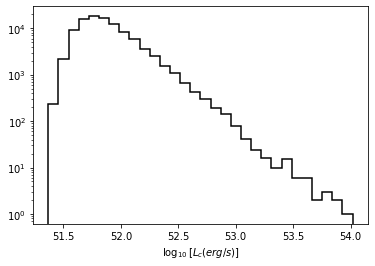

In [4]:
plt.hist(np.log10(l), bins=30, edgecolor='black', histtype='step', linewidth=1.5)
plt.yscale('log')
plt.xlabel('$\log_{10}[L_c(erg/s)]$')

Text(0.5, 0, '$\\log_{10}[E_p(keV)]$')

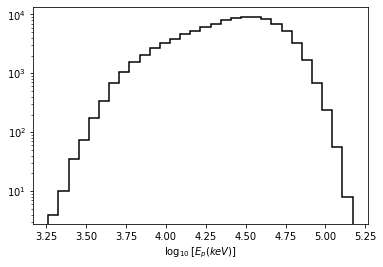

In [5]:
plt.hist(np.log10(ep), bins=30, edgecolor='black', histtype='step', linewidth=1.5)
plt.yscale('log')
plt.xlabel('$\log_{10}[E_p(keV)]$')

We now produce the posterior distribution of the luminosity and $E_p$ angular profiles. The results is obtained extracting, for each angle, the hyperparameters and the L and $E_p$ parameters themselves.

In [6]:
chain = './chains/SGRB_GBM_pdetgbm_final_newsample.h5'
chain2 = './chains/SGRB_flux-limited-sample-analysis.h5'
thin = 3
x,ll = read_chain(chain,burnin_fraction=0.5,thin=thin)
specmodel = 'Comp'
alpha = -0.4
inst = 'Fermi'

num =500

theta_sam = np.logspace(np.log10(0.5*np.pi/180.),np.log10(np.pi/2.),num=30)
print(len(theta_sam))
l_samples = [[] for _ in range(30)]
ep_samples = [[] for _ in range(30)]

out_samples = num

for i in range(out_samples):
    
    theta_pop = {'jetmodel':'smooth double power law',
             'thc':10**x[i,0],
             'Lc*':10**x[i,1],
             'a_L':x[i,2],
             'b_L':x[i,3],
             'Epc*':10**x[i,4],
             'a_Ep':x[i,5],
             'b_Ep':x[i,6],
             'thw':10**x[i,7],
             'A':x[i,8],
             's_c':10**x[i,9],
             'y':x[i,10],
             'a':x[i,11],
             'b':x[i,12],
             'zp':x[i,13]
             }
    
    l,ep = extract_lc_ep(theta_pop['Lc*'],theta_pop['A'],theta_pop['Epc*'],theta_pop['y'],theta_pop['s_c'],1000)
    
    for n in range(len(theta_sam)):
        

        th = theta_sam[n]

        tildeL = l*grbpop.structjet.ell(th,theta_pop)
        tildeEp = ep*grbpop.structjet.eta(th,theta_pop)
        
        l_samples[n].extend(tildeL)
        ep_samples[n].extend(tildeEp)
        


30


Text(0.5, 0, '$\\log_{10}[theta_v(deg)]$')

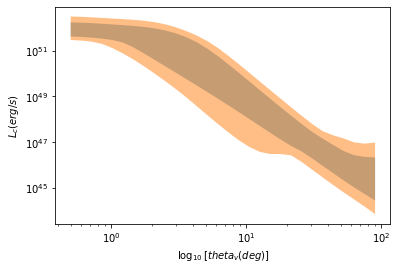

In [7]:
perc_16 = []
perc_84 = []

perc_5 = []
perc_95 = []

for i in range(len(theta_sam)):
    th = theta_sam[i]
    perc_16.append(np.percentile(l_samples[i],16))
    perc_84.append(np.percentile(l_samples[i],84))
    perc_5.append(np.percentile(l_samples[i],5))
    perc_95.append(np.percentile(l_samples[i],95))    
    
plt.fill_between(theta_sam*180/np.pi,perc_16,perc_84, alpha=0.5)
plt.fill_between(theta_sam*180/np.pi,perc_5,perc_95, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$L_c(erg/s)$')
plt.xlabel('$\log_{10}[theta_v(deg)]$')

Text(0.5, 0, '$\\log_{10}[theta_v(deg)]$')

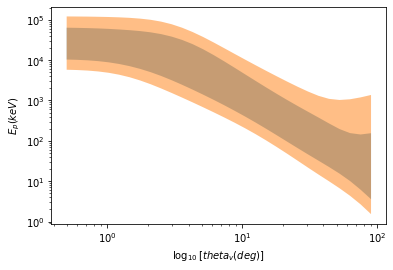

In [8]:
perc_16 = []
perc_84 = []

perc_5 = []
perc_95 = []

for i in range(len(theta_sam)):
    th = theta_sam[i]
    perc_16.append(np.percentile(ep_samples[i],16))
    perc_84.append(np.percentile(ep_samples[i],84))
    perc_5.append(np.percentile(ep_samples[i],5))
    perc_95.append(np.percentile(ep_samples[i],95))    
    
plt.fill_between(theta_sam*180/np.pi,perc_16,perc_84, alpha=0.5)
plt.fill_between(theta_sam*180/np.pi,perc_5,perc_95, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$E_p(keV)$')
plt.xlabel('$\log_{10}[theta_v(deg)]$')

The following block computes the probability distribution of the peak flux and the detection probability, having fixed distance, inclination angle and limiting flux of the instrument.

In [9]:
from grbpop.sampling import p_flux_samples

chain = './chains/SGRB_GBM_pdetgbm_final_newsample.h5'
chain2 = './chains/SGRB_flux-limited-sample-analysis.h5'
thin = 3
x,ll = read_chain(chain,burnin_fraction=0.5,thin=thin)
specmodel = 'Comp'
alpha = -0.4
inst = 'Fermi'
num=100

f = p_flux_samples(0.01,20*np.pi/180,x, alpha, specmodel, inst, num)



The detection probability is 49.366 %


Text(0.5, 0, '$\\log_{10}[\\rm pf(ph/cm^2 s)]$')

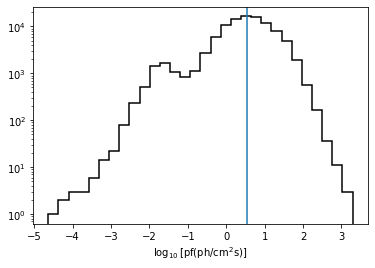

In [10]:


plim = 3.5

det_prob = np.sum(f > plim)/len(f)

print('The detection probability is %s %%' %(det_prob*100))


plt.hist(np.log10(f), bins=30, edgecolor='black', histtype='step', linewidth=1.5)
plt.axvline(np.log10(plim))
plt.yscale('log')
plt.xlabel('$\log_{10}[\\rm pf(ph/cm^2 s)]$')

